# Lab 1: Getting Started with Image Processing

## <font color = orange> 1. What is an image? </font>

- An image is a 2-dimensional function f(x,y) that maps a coordinate-pair to an integer/real value representing intensity/color of the point.

- Each point in an image is called a pixel or pel (picture element).

- Images can have single or multiple channels.
    - Single-channel images include binary, monochrome, grayscale, and black-and-white images.
    
    - Colored images such as RGB images have multiple channels, with each pixel represented by a three-tuple ($R_{x, y}$, $G_{x, y}$, $B_{x, y}$).
    
- In an RGB image, each channel represents a primary color (red, green, or blue) and the combination of the three channels creates the color of each pixel.


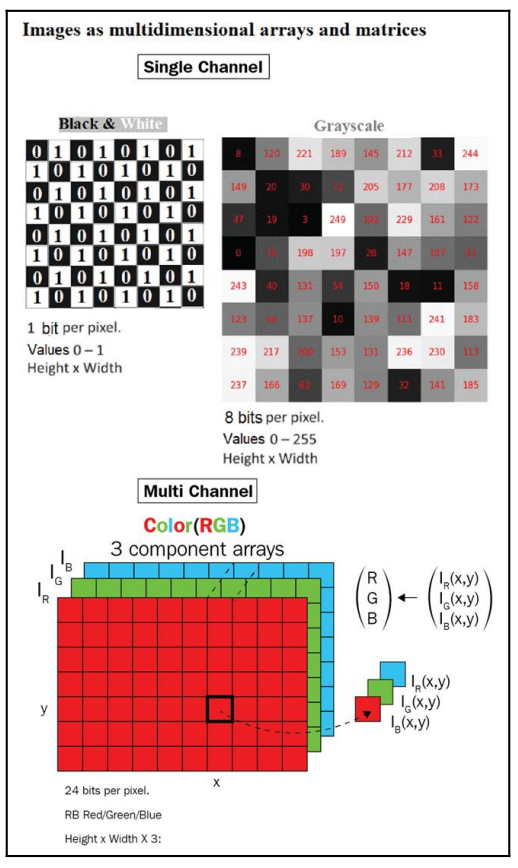

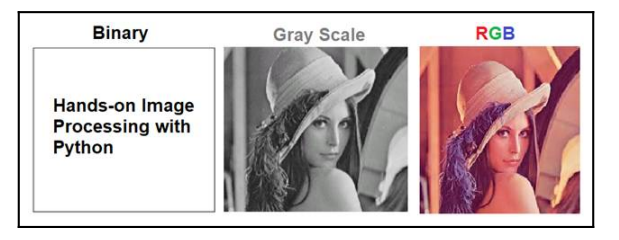

## <font color = orange> 2. How the image is stored on the computer? </font>

In order to process an image on a computer, it needs to be converted into a digital form that can be stored and manipulated by the computer. This digital conversion process involves two steps: <b> sampling and quantization </b>.

- <b> Sampling (Digitization of the spatial coordinates): </b>  refers to the process of converting the continuous spatial coordinates (x,y) of an image into discrete values. 

- <b> Quantization (Amplitude digitization): </b>   refers to the process of converting the continuous intensity values of an image into a finite set of discrete values. This involves mapping the continuous range of intensity values to a finite number of levels. The most common number of levels used is 256, which corresponds to an 8-bit image. 

Once an image has been sampled and quantized, it can be stored in a computer file format. There are many different types of image file formats, each with its own advantages and disadvantages. Some of the most commonly used file formats include JPEG, PNG, BMP, and TIFF. The choice of file format depends on factors such as the size of the image, the desired level of compression, and the intended use of the image.

## <font color = orange> 3. The image processing pipeline </font>

1. <b> Acquisition and storage:</b> The image needs to be captured (using a camera, for example) and stored on some device (such as a hard disk) as a file (for example, a JPEG file).

2. <b> Load into memory and save to disk:</b> The image needs to be read from the disk into memory and stored using some data structure (for example, numpy ndarray)

3. <b> Manipulation, enhancement, and restoration: </b> We need to run some preprocessing algorithms to do the following:
    - Run a few transformations on the image (sampling and manipulation; for example, grayscale conversion)
    - Enhance the quality of the image (filtering; for example, deblurring)
    - Restore the image from noise degradation

4. <b>Segmentation: </b> The image needs to be segmented in order to extract the objects of interest.

5. <b> Information extraction/representation: </b> The image needs to be represented in some alternative form; for example, one of the following:

    - Some hand-crafted feature-descriptor can be computed (for example, HOG descriptors, with classical image processing) from the image.

    - Some features can be automatically learned from the image (for example, the weights and bias values learned in the hidden layers of a neural net with deep learning)
    
    - The image is going to be represented using that alternative representation 





6. <b> Image understanding/interpretation:</b> This representation will be used to understand the image better with the following:

    - Image classification (for example, whether an image contains a human object or not)
    
    - Object recognition (for example, finding the location of the car objects in an image with a bounding box)


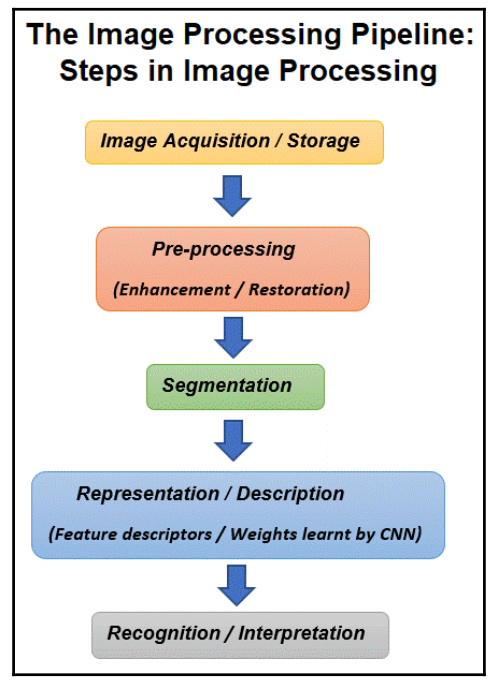

<b> Different modules that we are going to use for different image processing tasks: </b>

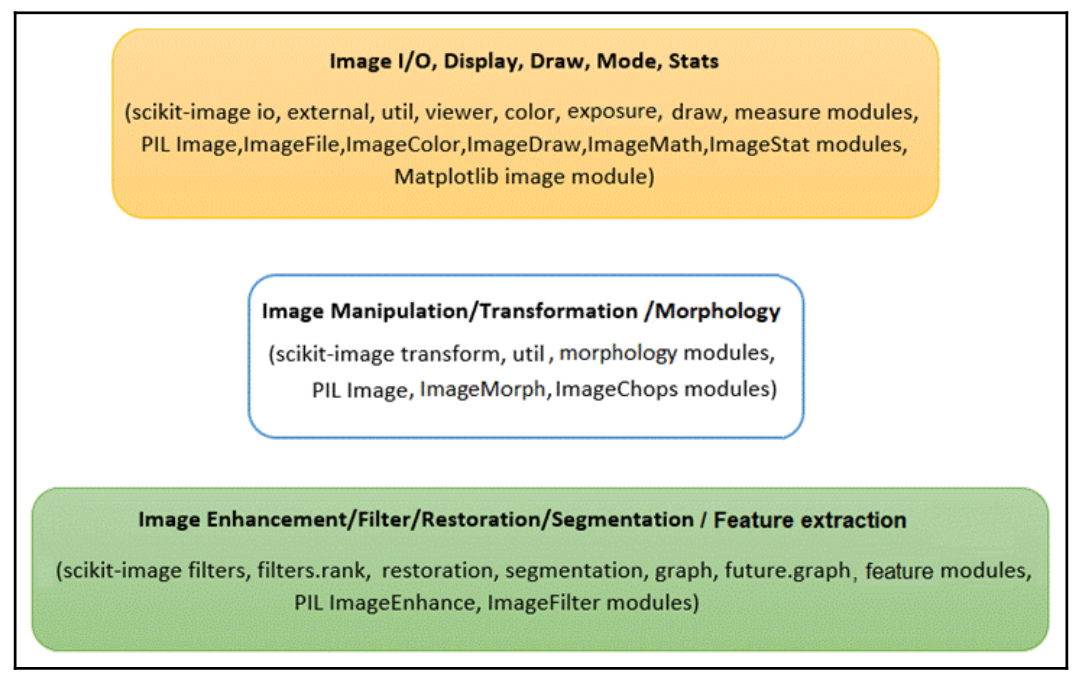

In addition to these libraries, we are going to use the following:
- scipy.ndimage and opencv for different image processing tasks
- scikit-learn for classical machine learning
- tensorflow and keras for deep learning

## <font color = orange> 4. Reading, saving, and displaying an image using PIL (Python Imaging Library) </font>

In [8]:
from PIL import Image, ImageFont, ImageDraw

im = Image.open("images/peacock.jpeg") # read the image, provide the correct path

print("Image Width: ", im.width)
print("Image Height: ", im.height)
print("Image mode: ", im.mode)
print("Image Format: ", im.format)
print("Image Type: ", type(im))

im.show() # display the image

Image Width:  404
Image Height:  316
Image mode:  RGB
Image Format:  JPEG
Image Type:  <class 'PIL.JpegImagePlugin.JpegImageFile'>


## <font color = orange> 5. Converting from RGB to gray using PIL </font>

In [9]:
im_g = im.convert('L') # convert the RGB color image to a grayscale image
im_g.save('images/peacock_gray.png') # save the image to disk
Image.open("images/peacock_gray.png").show() # read the grayscale image from disk and show

## <font color = orange> 6. Reading, saving, and displaying an image using Matplotlib </font>

The next code block shows how to use the imread() function from matplotlib.image to read an image in a floating-point numpy ndarray. The pixel values are represented as real values between 0 and 1:

(316, 404, 3) uint8 <class 'numpy.ndarray'>


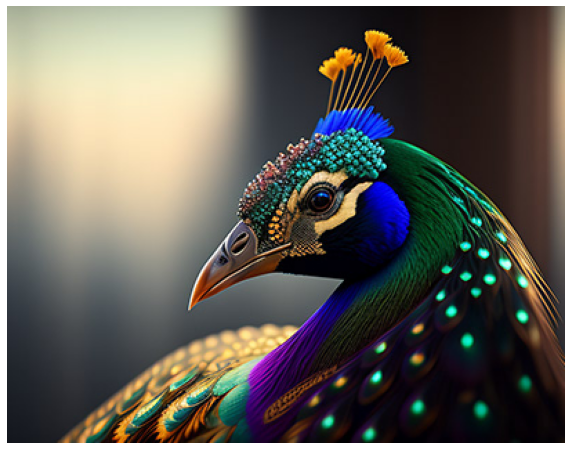

In [11]:
# import matplotlib.image as mpimg
import matplotlib.pylab as plt
import matplotlib.image as img

im = img.imread("images/peacock.jpeg") # read the image from disk as a numpy ndarray
print(im.shape, im.dtype, type(im)) # this image contains an αchannel, hence num_channels= 4

plt.figure(figsize=(10,10))
plt.imshow(im) # display the image
plt.axis('off')
plt.show()


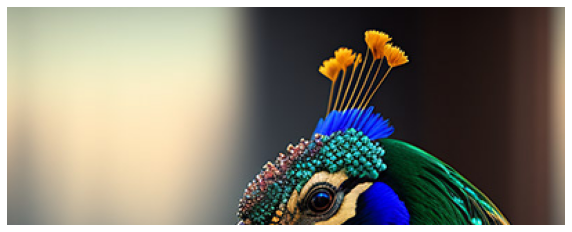

In [12]:
# image slicing 
im_sliced = im[0:158, : , :]

plt.figure(figsize=(10,10))
plt.imshow(im_sliced) # display the image
plt.axis('off')
plt.show()

## <font color = orange> 7. RGB to HSV using skimage </font>

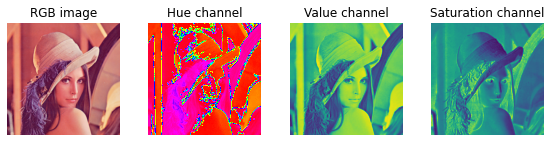

In [59]:
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage.color import rgb2hsv

rgb_img = imread("images/Lenna.png")

hsv_img = rgb2hsv(rgb_img)

hue_img = hsv_img[:, :, 0]

saturation_img = hsv_img[:, :, 1]

value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(ncols=4, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')

ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')

ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

ax3.imshow(saturation_img)
ax3.set_title("Saturation channel")
ax3.axis('off')

fig.tight_layout()


HSV images—each pixel is represented by three tuple (h, s, v) values:
- representing hue (color),
- saturation (colorfulness—how much the color is mixed with white)
- value (brightness—how much the color is mixed with black) 

The HSV model describescolors in a similar manner to how the human eye tends to perceive colors. 